In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# To plot pretty figures
#%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter_1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "src_images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def get_path(fig_name, fig_extension="png"):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    return path


In [2]:
from qiskit import QuantumCircuit,transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

## 🔹 X Gate

**Unitary Matrix:**
```
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
```

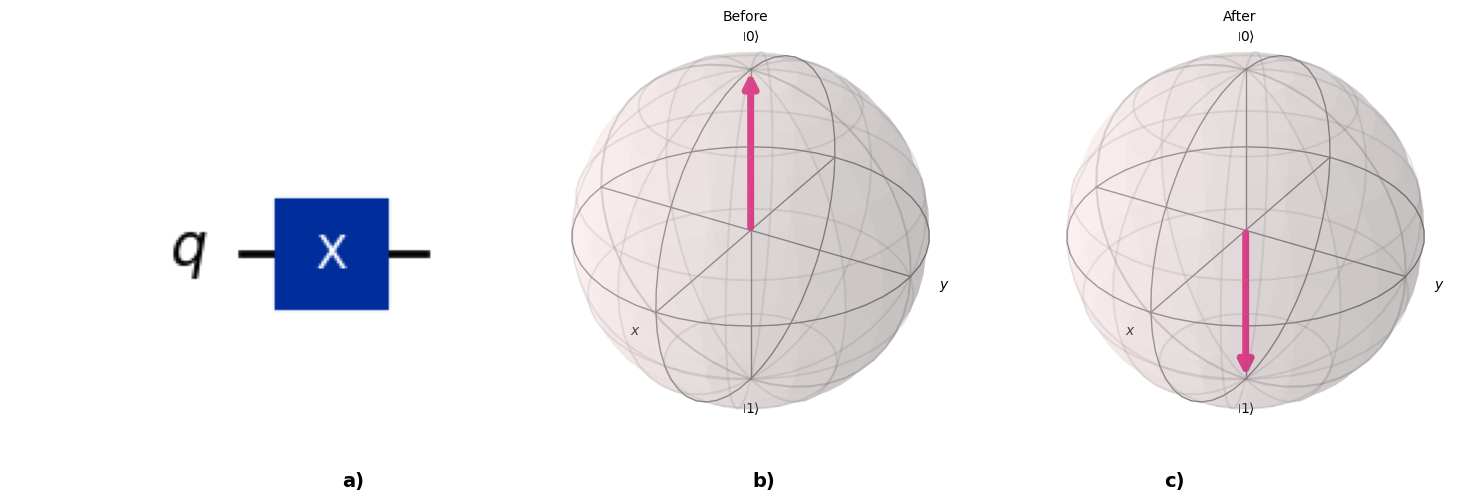

## 🔹 H Gate

**Unitary Matrix:**
```
[[ 0.707+0.j  0.707+0.j]
 [ 0.707+0.j -0.707+0.j]]
```

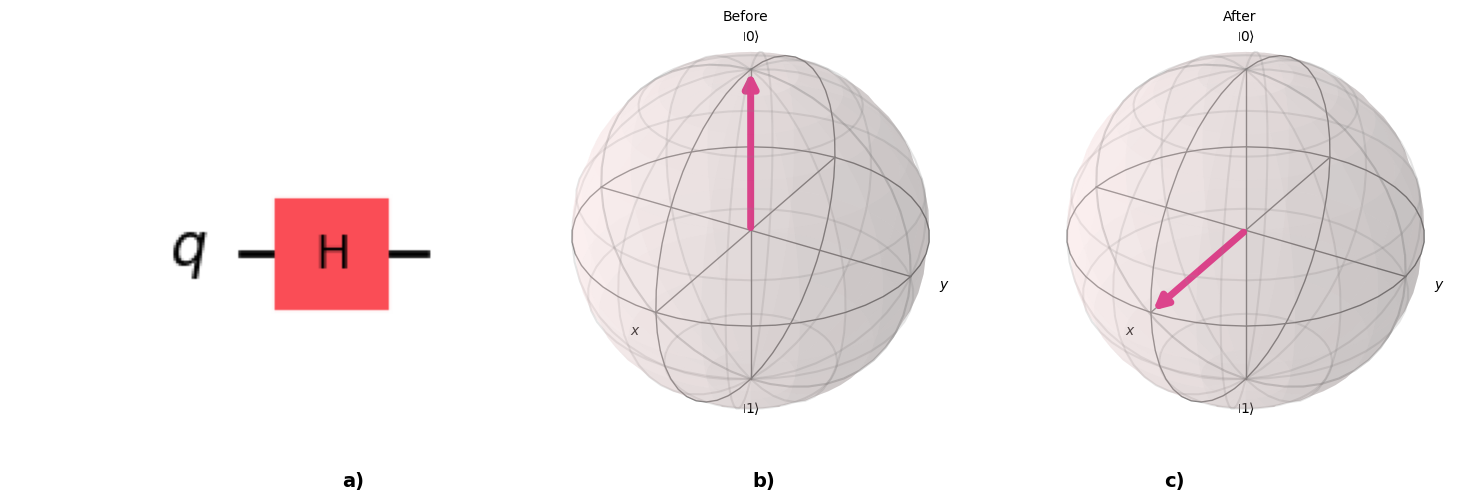

## 🔹 Y Gate

**Unitary Matrix:**
```
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
```

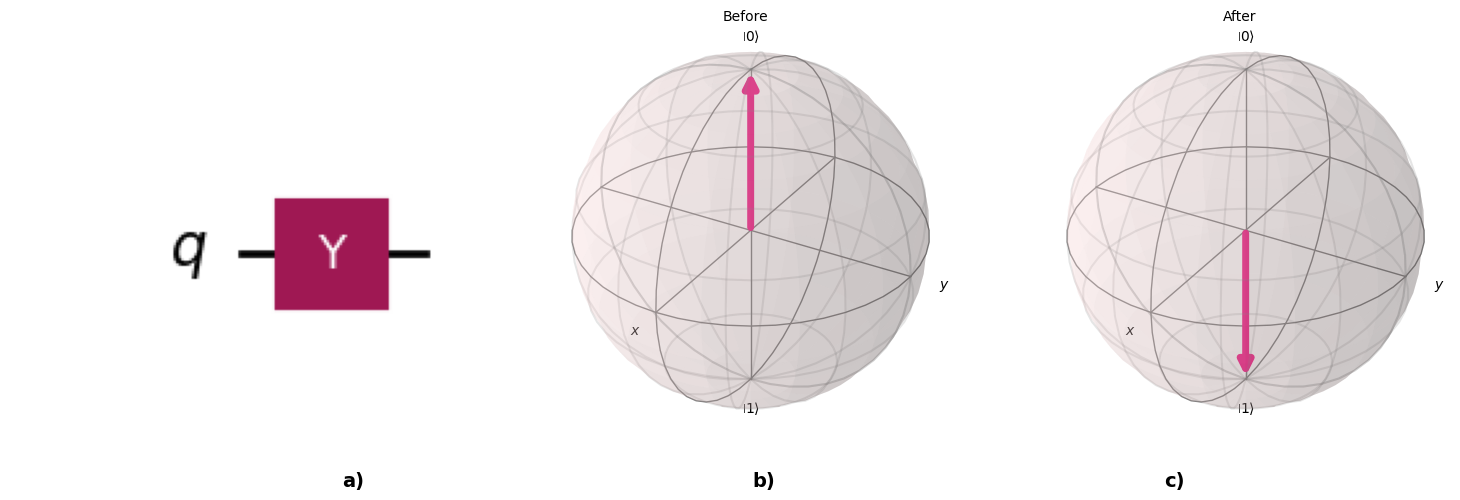

## 🔹 Z Gate

**Unitary Matrix:**
```
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
```

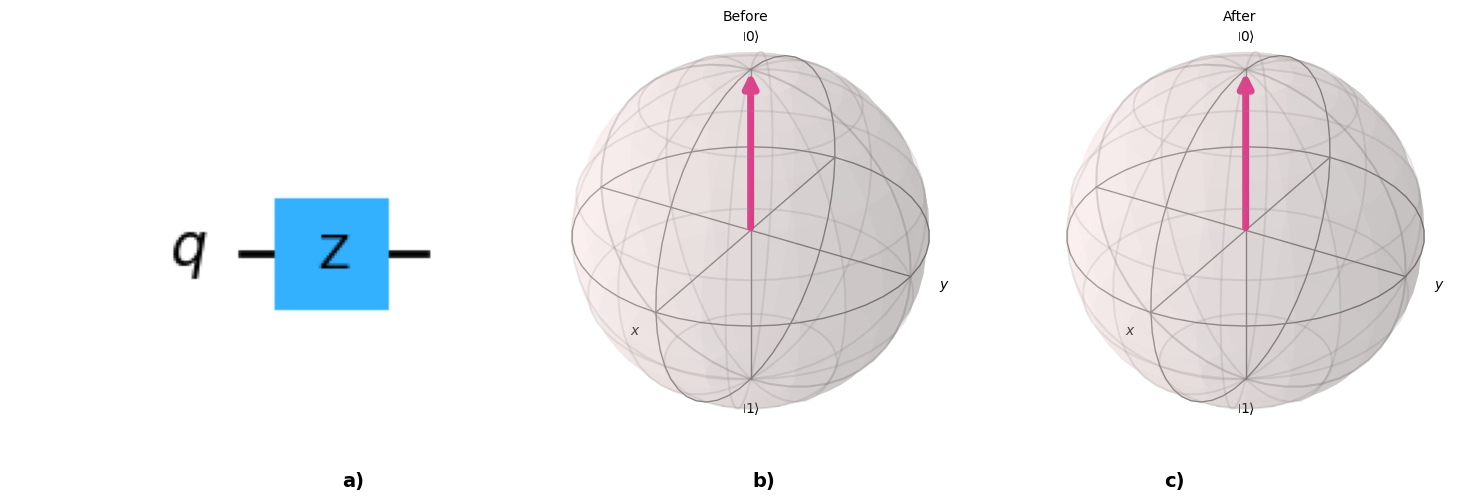

## 🔹 I Gate

**Unitary Matrix:**
```
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
```

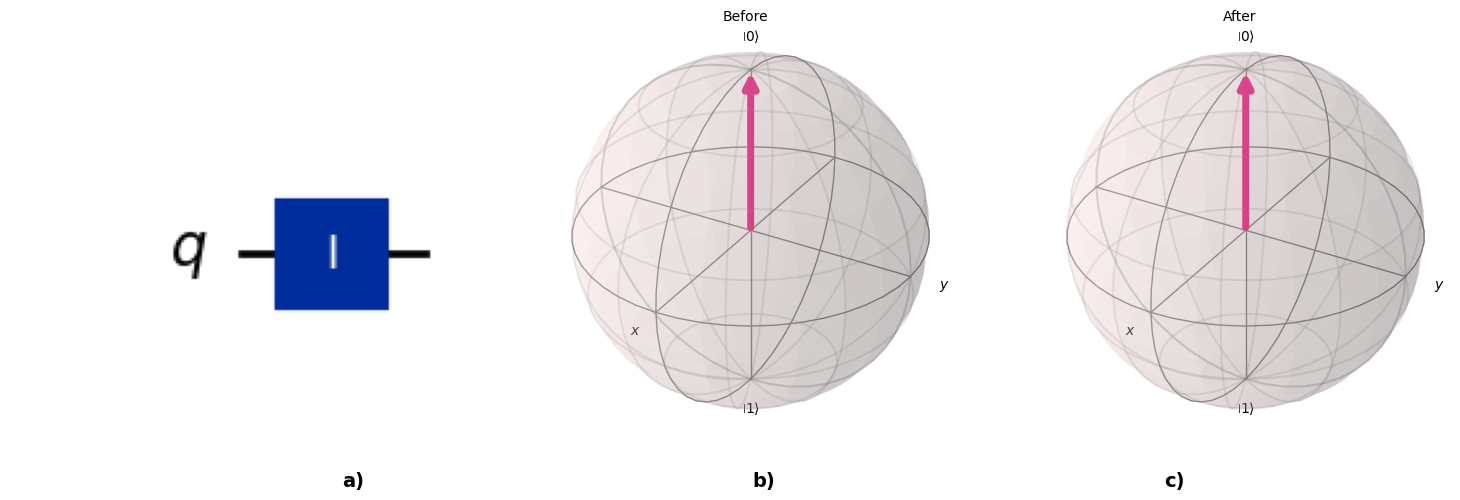

## 🔹 T Gate

**Unitary Matrix:**
```
[[1.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.707+0.707j]]
```

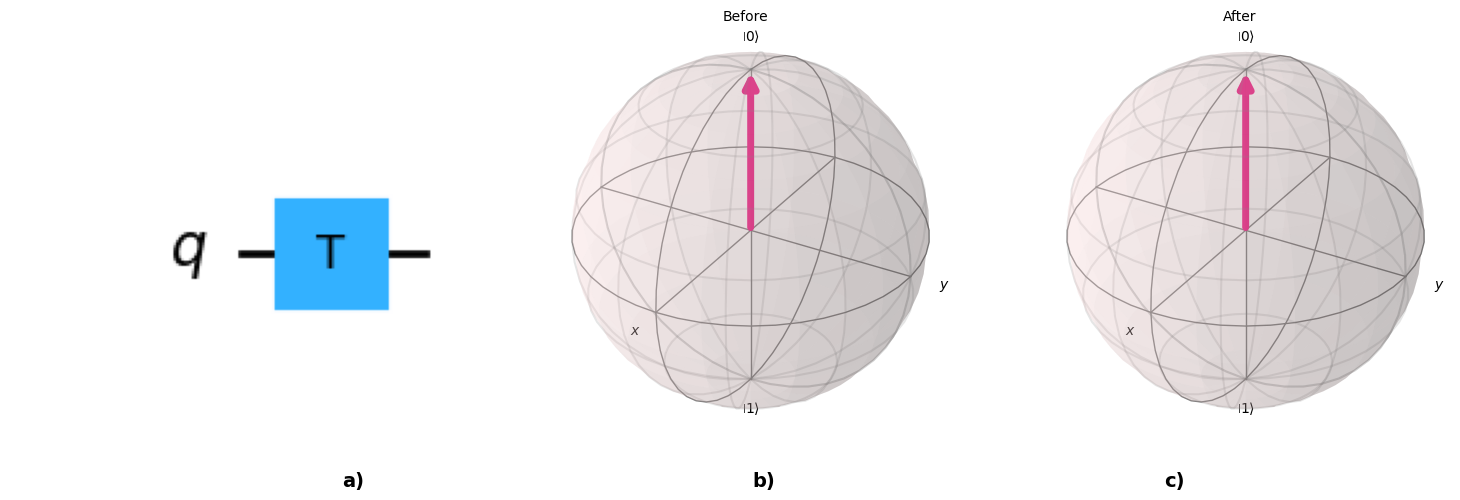

## 🔹 S Gate

**Unitary Matrix:**
```
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
```

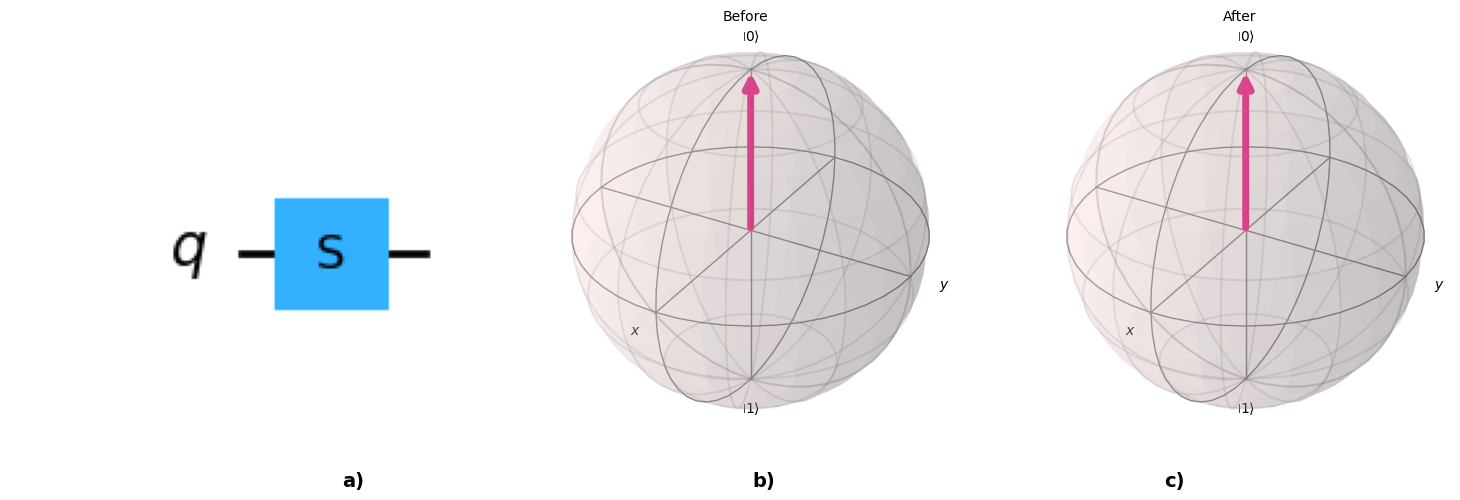

In [48]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_vector
from IPython.display import display, Markdown

def bloch_coords(state):
    rho = state.to_operator().data
    x = np.real(np.trace(rho @ np.array([[0, 1], [1, 0]])))
    y = np.real(np.trace(rho @ np.array([[0, -1j], [1j, 0]])))
    z = np.real(np.trace(rho @ np.array([[1, 0], [0, -1]])))
    return [x, y, z]

gates = [
    ("X Gate", lambda qc: qc.x(0)),
    ("H Gate", lambda qc: qc.h(0)),
    ("Y Gate", lambda qc: qc.y(0)),
    ("Z Gate", lambda qc: qc.z(0)),
    ("I Gate", lambda qc: qc.id(0)),
    ("T Gate", lambda qc: qc.t(0)),
    ("S Gate", lambda qc: qc.s(0)),
]

for name, gate_func in gates:
    display(Markdown(f"## 🔹 {name}"))

    qc = QuantumCircuit(1)
    gate_func(qc)

    unitary = np.round(Operator(qc).data, 3)
    display(Markdown(f"**Unitary Matrix:**\n```\n{unitary}\n```"))

    initial_state = Statevector.from_label('0')
    final_state = initial_state.evolve(qc)

    vec_before = bloch_coords(initial_state)
    vec_after = bloch_coords(final_state)

    circ_fig = qc.draw(output='mpl', fold=0)
    buf = io.BytesIO()
    circ_fig.savefig(buf, format='png')
    plt.close(circ_fig)
    buf.seek(0)
    circ_img = Image.open(buf)

    fig = plt.figure(figsize=(15, 5))
    gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])

    ax_circ = fig.add_subplot(gs[0])
    ax_circ.imshow(circ_img)
    ax_circ.axis('off')

    ax_before = fig.add_subplot(gs[1], projection='3d')
    plot_bloch_vector(vec_before, title='Before', ax=ax_before)

    ax_after = fig.add_subplot(gs[2], projection='3d')
    plot_bloch_vector(vec_after, title='After', ax=ax_after)

    # Use the same y coordinate for all labels for horizontal alignment
    y_label = 0.05  # 5% from bottom of figure

    for ax, label in zip([ax_circ, ax_before, ax_after], ['a)', 'b)', 'c)']):
        bbox = ax.get_position()
        x_text = bbox.x0 + bbox.width / 2
        fig.text(x_text, y_label, label, ha='center', fontsize=14, fontweight='bold')

    fig.savefig(
        get_path(name),
        bbox_inches='tight',
        pad_inches=0)
    plt.tight_layout(rect=[0, 0.1, 1, 1])  # leave space at bottom for labels
    plt.show()
